## WeatherPy - Amanda Gaston
* Observation 1 | The closer one gets to the Equator, or 0° Latitude, the higher the temperature is. Because the weather data that is given is current info, temperatures are still higher as you get further from the Equator going South because the Southern Hemisphere is experiencing Summer right now. If you go North of the Equator, the temperatures drop - the Northern Hemisphere is experiencing Winter right now.
* Observation 2 | Humidity, Cloudiness & Wind Speed don't seem to correspond with the Latitude of a city, which may be because other factors play into the three: like the nearness to water, agriculture, wind patterns, etc. The charts show the Humidity, Cloudiness & Wind Speed data as evenly spread out.
* Observation 3 | Wind Speed is rarely above 25 mph, and if it is, it is more likely to be further away from the equator

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

In [3]:
print(cities)

['atyrau', 'mataura', 'kaohsiung', 'cognac', 'vaini', 'rikitea', 'busselton', 'tiksi', 'mar del plata', 'varhaug', 'lagoa', 'namibe', 'saldanha', 'auala', 'provideniya', 'acarau', 'arraial do cabo', 'babayurt', 'georgetown', 'sentyabrskiy', 'jamestown', 'hilo', 'ancud', 'clyde river', 'qaanaaq', 'knokke-heist', 'port lincoln', 'gamba', 'ushuaia', 'xuanhua', 'aklavik', 'ponta do sol', 'cape town', 'souillac', 'puerto ayora', 'albany', 'sinop', 'longyearbyen', 'kapaa', 'bluff', 'sao jose da coroa grande', 'anadyr', 'avarua', 'havoysund', 'waingapu', 'hermanus', 'samusu', 'mahebourg', 'guiyang', 'sorland', 'srednekolymsk', 'atuona', 'feldkirchen', 'port alfred', 'thung song', 'opobo', 'korla', 'bredasdorp', 'yining', 'port elizabeth', 'mount gambier', 'sergeyevka', 'nanortalik', 'lyngseidet', 'thinadhoo', 'kirakira', 'castro', 'popondetta', 'koslan', 'cidreira', 'beringovskiy', 'punta arenas', 'gat', 'dhidhdhoo', 'barrow', 'tuktoyaktuk', 'toliary', 'perumpavur', 'victoria', 'piacabucu', '

In [4]:
# Remove spaces in City Data
cities = [city.replace(" ", "+") for city in cities]
print(cities)

['atyrau', 'mataura', 'kaohsiung', 'cognac', 'vaini', 'rikitea', 'busselton', 'tiksi', 'mar+del+plata', 'varhaug', 'lagoa', 'namibe', 'saldanha', 'auala', 'provideniya', 'acarau', 'arraial+do+cabo', 'babayurt', 'georgetown', 'sentyabrskiy', 'jamestown', 'hilo', 'ancud', 'clyde+river', 'qaanaaq', 'knokke-heist', 'port+lincoln', 'gamba', 'ushuaia', 'xuanhua', 'aklavik', 'ponta+do+sol', 'cape+town', 'souillac', 'puerto+ayora', 'albany', 'sinop', 'longyearbyen', 'kapaa', 'bluff', 'sao+jose+da+coroa+grande', 'anadyr', 'avarua', 'havoysund', 'waingapu', 'hermanus', 'samusu', 'mahebourg', 'guiyang', 'sorland', 'srednekolymsk', 'atuona', 'feldkirchen', 'port+alfred', 'thung+song', 'opobo', 'korla', 'bredasdorp', 'yining', 'port+elizabeth', 'mount+gambier', 'sergeyevka', 'nanortalik', 'lyngseidet', 'thinadhoo', 'kirakira', 'castro', 'popondetta', 'koslan', 'cidreira', 'beringovskiy', 'punta+arenas', 'gat', 'dhidhdhoo', 'barrow', 'tuktoyaktuk', 'toliary', 'perumpavur', 'victoria', 'piacabucu', '

In [5]:
# URL components
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Starter Query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Lists
code = []
country = []
cloud = []
date = []
humd = []
lat = []
long = []
temp = []
wind = []

# Loop through cities to grab data
for city in cities:
    response = requests.get(query_url + city).json()
    code.append(response['cod'])
    if response["cod"]!=200:
        cities.remove(city)
        continue
    country.append(response['sys']['country'])
    cloud.append(response['clouds']['all'])
    date.append(response['dt'])
    humd.append(response['main']['humidity'])
    lat.append(response['coord']['lat'])
    long.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    wind.append(response['wind']['speed'])
    print(f"Processing Record | {city} {query_url}{city}")
    time.sleep(1)

Processing Record | atyrau http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=atyrau
Processing Record | mataura http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=mataura
Processing Record | kaohsiung http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=kaohsiung
Processing Record | cognac http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=cognac
Processing Record | vaini http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=vaini
Processing Record | rikitea http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=rikitea
Processing Record | busselton http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=busselton
Processing Record | tiksi h

Processing Record | koslan http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=koslan
Processing Record | cidreira http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=cidreira
Processing Record | beringovskiy http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=beringovskiy
Processing Record | punta+arenas http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=punta+arenas
Processing Record | gat http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=gat
Processing Record | dhidhdhoo http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=dhidhdhoo
Processing Record | barrow http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=barrow
Processing Re

Processing Record | klaksvik http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=klaksvik
Processing Record | butaritari http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=butaritari
Processing Record | bloemhof http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=bloemhof
Processing Record | san+pedro http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=san+pedro
Processing Record | saint+george http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=saint+george
Processing Record | saint-philippe http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=saint-philippe
Processing Record | cadillac http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperia

Processing Record | qaqortoq http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=qaqortoq
Processing Record | naryan-mar http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=naryan-mar
Processing Record | east+london http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=east+london
Processing Record | wabag http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=wabag
Processing Record | faanui http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=faanui
Processing Record | bethel+park http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=bethel+park
Processing Record | honolulu http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=honolulu
Process

Processing Record | vokhma http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=vokhma
Processing Record | west+odessa http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=west+odessa
Processing Record | astana http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=astana
Processing Record | kharitonovo http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=kharitonovo
Processing Record | port+hedland http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=port+hedland
Processing Record | mosquera http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=mosquera
Processing Record | cherusti http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=cherusti
P

Processing Record | tateyama http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=tateyama
Processing Record | vardo http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=vardo
Processing Record | pacific+grove http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=pacific+grove
Processing Record | grand+gaube http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=grand+gaube
Processing Record | xocali http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=xocali
Processing Record | murray+bridge http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=murray+bridge
Processing Record | saint-denis http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=sai

Processing Record | ambon http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=ambon
Processing Record | batticaloa http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=batticaloa
Processing Record | shimoda http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=shimoda
Processing Record | utete http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=utete
Processing Record | abha http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=abha
Processing Record | saiki http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=saiki
Processing Record | awbari http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=awbari
Processing Record | eyl http://api.openwe

Processing Record | panjakent http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=panjakent
Processing Record | yuzhnyy http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=yuzhnyy
Processing Record | la+mira http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=la+mira
Processing Record | holme http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=holme
Processing Record | abatskoye http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=abatskoye
Processing Record | lawrenceburg http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=lawrenceburg
Processing Record | camacha http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=camacha
Processing Re

Processing Record | grindavik http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=grindavik
Processing Record | port+hardy http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=port+hardy
Processing Record | contamana http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=contamana
Processing Record | ponta+delgada http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=ponta+delgada
Processing Record | vanderhoof http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=vanderhoof
Processing Record | sabang http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=sabang
Processing Record | sangar http://api.openweathermap.org/data/2.5/weather?appid=bc9f9de6d22cc28e52732bc90d434fc5&units=imperial&q=sangar

In [6]:
# Check Values in Arrays
len(cities), len(code), len(country), len(cloud), len(date), len(humd), len(lat), len(long), len(temp), len(wind)

(581, 581, 522, 522, 522, 522, 522, 522, 522, 522)

In [7]:
# Clean up Cities Code
print(cities)
print(code)

['atyrau', 'mataura', 'kaohsiung', 'cognac', 'vaini', 'rikitea', 'busselton', 'tiksi', 'mar+del+plata', 'varhaug', 'lagoa', 'namibe', 'saldanha', 'provideniya', 'arraial+do+cabo', 'babayurt', 'georgetown', 'jamestown', 'hilo', 'ancud', 'clyde+river', 'qaanaaq', 'knokke-heist', 'port+lincoln', 'gamba', 'ushuaia', 'xuanhua', 'aklavik', 'ponta+do+sol', 'cape+town', 'souillac', 'puerto+ayora', 'albany', 'sinop', 'longyearbyen', 'kapaa', 'bluff', 'sao+jose+da+coroa+grande', 'anadyr', 'avarua', 'havoysund', 'waingapu', 'hermanus', 'mahebourg', 'guiyang', 'sorland', 'srednekolymsk', 'atuona', 'feldkirchen', 'port+alfred', 'thung+song', 'korla', 'bredasdorp', 'yining', 'port+elizabeth', 'mount+gambier', 'sergeyevka', 'nanortalik', 'lyngseidet', 'thinadhoo', 'kirakira', 'castro', 'popondetta', 'koslan', 'cidreira', 'beringovskiy', 'punta+arenas', 'gat', 'dhidhdhoo', 'barrow', 'tuktoyaktuk', 'perumpavur', 'victoria', 'piacabucu', 'ilulissat', 'porto+walter', 'bilma', 'egvekinot', 'khatanga', 'za

In [8]:
# Zip City/Code
citycode = [(a, b) for a, b in zip(cities, code) if b == 200]
print(citycode)

[('atyrau', 200), ('mataura', 200), ('kaohsiung', 200), ('cognac', 200), ('vaini', 200), ('rikitea', 200), ('busselton', 200), ('tiksi', 200), ('mar+del+plata', 200), ('varhaug', 200), ('lagoa', 200), ('namibe', 200), ('saldanha', 200), ('babayurt', 200), ('georgetown', 200), ('hilo', 200), ('ancud', 200), ('clyde+river', 200), ('qaanaaq', 200), ('knokke-heist', 200), ('port+lincoln', 200), ('gamba', 200), ('ushuaia', 200), ('xuanhua', 200), ('aklavik', 200), ('ponta+do+sol', 200), ('cape+town', 200), ('souillac', 200), ('puerto+ayora', 200), ('albany', 200), ('sinop', 200), ('longyearbyen', 200), ('kapaa', 200), ('bluff', 200), ('sao+jose+da+coroa+grande', 200), ('anadyr', 200), ('avarua', 200), ('havoysund', 200), ('waingapu', 200), ('hermanus', 200), ('guiyang', 200), ('sorland', 200), ('srednekolymsk', 200), ('atuona', 200), ('feldkirchen', 200), ('port+alfred', 200), ('thung+song', 200), ('bredasdorp', 200), ('yining', 200), ('port+elizabeth', 200), ('mount+gambier', 200), ('serge

In [9]:
# Check Values in Arrays
len(citycode), len(country), len(cloud), len(date), len(humd), len(lat), len(long), len(temp), len(wind)

(522, 522, 522, 522, 522, 522, 522, 522, 522)

In [10]:
# Unzip City/Code
cities, code = zip(*citycode)
print(cities)
print(code)

('atyrau', 'mataura', 'kaohsiung', 'cognac', 'vaini', 'rikitea', 'busselton', 'tiksi', 'mar+del+plata', 'varhaug', 'lagoa', 'namibe', 'saldanha', 'babayurt', 'georgetown', 'hilo', 'ancud', 'clyde+river', 'qaanaaq', 'knokke-heist', 'port+lincoln', 'gamba', 'ushuaia', 'xuanhua', 'aklavik', 'ponta+do+sol', 'cape+town', 'souillac', 'puerto+ayora', 'albany', 'sinop', 'longyearbyen', 'kapaa', 'bluff', 'sao+jose+da+coroa+grande', 'anadyr', 'avarua', 'havoysund', 'waingapu', 'hermanus', 'guiyang', 'sorland', 'srednekolymsk', 'atuona', 'feldkirchen', 'port+alfred', 'thung+song', 'bredasdorp', 'yining', 'port+elizabeth', 'mount+gambier', 'sergeyevka', 'nanortalik', 'lyngseidet', 'thinadhoo', 'kirakira', 'castro', 'popondetta', 'koslan', 'cidreira', 'beringovskiy', 'punta+arenas', 'gat', 'dhidhdhoo', 'barrow', 'tuktoyaktuk', 'victoria', 'piacabucu', 'ilulissat', 'porto+walter', 'bilma', 'egvekinot', 'khatanga', 'zarinsk', 'hobart', 'yellowknife', 'zasheyek', 'fortuna', 'cam+ranh', 'hulan+ergi', '

In [11]:
# Check Values in Arrays
len(cities), len(code), len(country), len(cloud), len(date), len(humd), len(lat), len(long), len(temp), len(wind)

(522, 522, 522, 522, 522, 522, 522, 522, 522, 522)

In [12]:
# Create a Data Frame
weather_dict = {
    "City": cities,
    "Country": country,
    "Cloudiness": cloud,
    "Date": date,
    "Humidity": humd,
    "Lat": lat,
    "Long": long,
    "Temperature": temp,
    "Wind speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Long,Temperature,Wind speed
0,atyrau,KZ,0,1560489785,29,47.10,51.92,66.2,24.61
1,mataura,NZ,100,1560489786,94,-46.19,168.86,52.0,3.00
2,kaohsiung,TW,75,1560489787,89,22.62,120.31,84.7,5.82
3,cognac,FR,0,1560489788,93,45.69,-0.33,56.1,5.82
4,vaini,IN,90,1560489789,94,15.34,74.49,75.2,6.93


In [13]:
#Data Counts
weather_data.count()

City           522
Country        522
Cloudiness     522
Date           522
Humidity       522
Lat            522
Long           522
Temperature    522
Wind speed     522
dtype: int64

In [14]:
# Push new Data Frame to a CSV file
weather_data.to_csv("Output/weather_data.csv",
                   encoding="utf-8", index=False, header=True)


In [15]:
# Import CSV
cities_df = pd.read_csv("Output/weather_data.csv")
cities_df.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Long,Temperature,Wind speed
0,atyrau,KZ,0,1560489785,29,47.10,51.92,66.2,24.61
1,mataura,NZ,100,1560489786,94,-46.19,168.86,52.0,3.00
2,kaohsiung,TW,75,1560489787,89,22.62,120.31,84.7,5.82
3,cognac,FR,0,1560489788,93,45.69,-0.33,56.1,5.82
4,vaini,IN,90,1560489789,94,15.34,74.49,75.2,6.93


In [16]:
# Check Values
cities_df.count()

City           522
Country        521
Cloudiness     522
Date           522
Humidity       522
Lat            522
Long           522
Temperature    522
Wind speed     522
dtype: int64

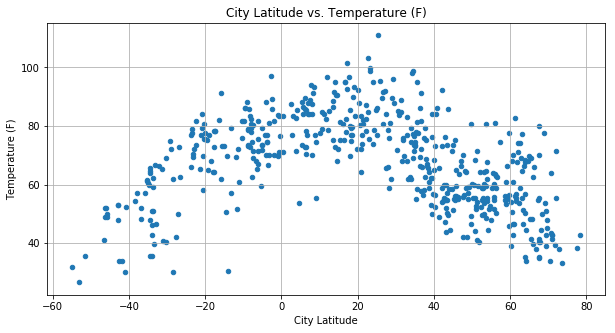

In [17]:
# Plot Latitude vs. Temperature
cities_df.plot(kind="scatter", x="Lat", y="Temperature", grid=True, figsize=(10,5),
              title="City Latitude vs. Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Images/LatTemp.png")
plt.show()

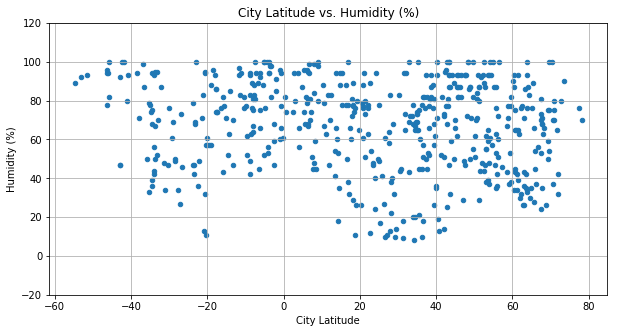

In [18]:
# Plot Latitude vs. Humidity
cities_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(10,5),
              title="City Latitude vs. Humidity (%)")
# Set the upper and lower limits of our y axis
plt.ylim(-20,120)
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/LatHumd.png")
plt.show()

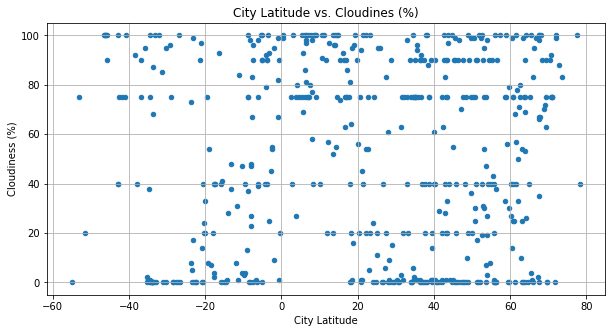

In [19]:
# Plot Latitude vs. Cloudiness
cities_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(10,5),
              title="City Latitude vs. Cloudines (%)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/LatCloud.png")
plt.show()

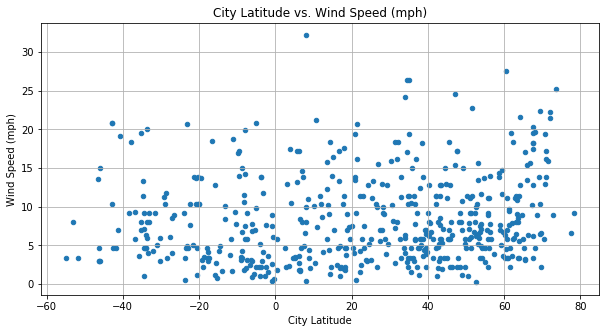

In [20]:
# Plot Latitude vs. Wind Speed
cities_df.plot(kind="scatter", x="Lat", y="Wind speed", grid=True, figsize=(10,5),
              title="City Latitude vs. Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/LatWind.png")
plt.show()